In [1]:
from transVAE.model.transVAE import transVAE
from transVAE.module._utils import check_adatas_var_index, compute_r2_score
import os
import scanpy as sc

/d/hpc/home/mo6643/miniconda3/envs/msc1/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/d/hpc/home/mo6643/miniconda3/envs/msc1/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [2]:
home_dir = "/d/hpc/projects/FRI/DL/mo6643/MSC/"

In [3]:
model_dir = "cross_species_prediction_save/baseline_models_save/transVAE_train_train_adata_baseline_top3000hvg.h5ad_hid800_lat512_lr0.005_cov10_ep1000_ly4_dr0.3_kl0.005_s44/"

In [4]:
adata_dir = "data/data_update_slack/data_splits/data_splits_train_merge/train_data/train_adata_baseline_top3000hvg.h5ad"

In [5]:
model_dir = os.path.join(home_dir, model_dir)
adata_dir = os.path.join(home_dir, adata_dir)

In [6]:
dataset_train = "train_adata_baseline_top3000hvg.h5ad"

In [68]:
adata_train = sc.read_h5ad(f"/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/train_data/{dataset_train}")

In [75]:
adata_train = transVAE.setup_anndata(adata_train, categorical_covariate_embed_keys=["dataset"], categorical_covariate_keys=["organism"], copy = True)

INFO     Using column names from columns of adata.obsm['covariates']                                               
INFO     Using column names from columns of adata.obsm['covariates_embed']                                         


In [77]:
model = transVAE(adata_train, n_hidden=800, n_latent=512, n_layers=4, dropout_rate=0.3)

In [79]:
import scvi

In [83]:
scvi.settings.seed = 44

[rank: 0] Global seed set to 44


In [85]:
model.train(max_epochs=100, batch_size=4048 ,plan_kwargs={"lr":0.005})

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 100/100: 100%|██████████| 100/100 [06:17<00:00,  3.45s/it, v_num=1, train_loss_step=84.7, train_loss_epoch=85.7]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [06:17<00:00,  3.77s/it, v_num=1, train_loss_step=84.7, train_loss_epoch=85.7]


In [88]:
dataset_to_predict = "Wang_to_predict_top3000_baseline_hvg.h5ad"
dataset_ground_truth1 = "dbdb_ground_truth_top3000_baseline_hvg.h5ad"
dataset_ground_truth2 = "mSTZ_ground_truth_top3000_baseline_hvg.h5ad"

In [89]:
adata_to_predict = sc.read_h5ad(f"/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/data_to_predict/{dataset_to_predict}")
dbdb_ground_truth = sc.read_h5ad(f"/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/{dataset_ground_truth1}")
mSTZ_ground_truth = sc.read_h5ad(f"/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/{dataset_ground_truth2}")

In [91]:
adata_to_predict_h = adata_to_predict[adata_to_predict.obs.disease == "healthy"]
adata_to_predict_OOD = adata_to_predict[adata_to_predict.obs.disease == "T2D"]

preds_dbdb_h = model.translate(adata_to_predict_h, translate_dict={"dataset":"db/db", "organism": "Mus musculus"})
preds_dbdb_OOD = model.translate(adata_to_predict_OOD, translate_dict={"dataset":"db/db", "organism": "Mus musculus"})

dbdb_ground_truth_h = dbdb_ground_truth[dbdb_ground_truth.obs.disease == "healthy"]
dbdb_ground_truth_OOD = dbdb_ground_truth[dbdb_ground_truth.obs.disease == "T2D"]

preds_mSTZ_h = model.translate(adata_to_predict_h, translate_dict={"dataset":"mSTZ", "organism": "Mus musculus"})
preds_mSTZ_OOD = model.translate(adata_to_predict_OOD, translate_dict={"dataset":"mSTZ", "organism": "Mus musculus"})

mSTZ_ground_truth_h = mSTZ_ground_truth[mSTZ_ground_truth.obs.disease == "healthy"]
mSTZ_ground_truth_OOD = mSTZ_ground_truth[mSTZ_ground_truth.obs.disease == "T2D"]

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/d/hpc/home/mo6643/miniconda3/envs/msc1/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/d/hpc/home/mo6643/miniconda3/envs/msc1/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [ ]:
adata_to_predict_h

AnnData object with n_obs × n_vars = 21012 × 3000
    obs: 'disease', 'dataset', 'organism'
    uns: 'covariate_orders', 'covariates_dict', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'covariates', 'covariates_embed'

In [100]:
def return_plot_datasets(preds, ground_truth):
    # Convert to densdataset adata.X is sparse
    ground_truth = ground_truth.X.toarray()
    ground_truth = ground_truth.mean(axis = 0)
    preds = preds.X.mean(axis = 0)
    # Compute R2 score
    return ground_truth, preds


In [102]:
plot_gt, plot_preds = return_plot_datasets(preds_dbdb_h, mSTZ_ground_truth_h)

In [98]:
import matplotlib.pyplot as plt

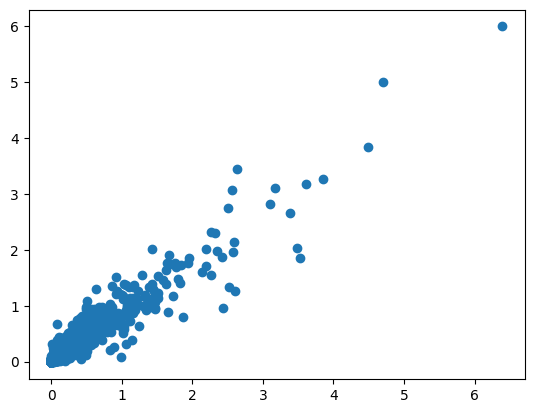

In [103]:
plt.scatter(plot_gt, plot_preds)

In [107]:
from sklearn.metrics import r2_score

In [116]:
def compute_r2_score(preds, ground_truth):
    # Convert to densdataset adata.X is sparse
    ground_truth = ground_truth.X.toarray()
    ground_truth = ground_truth.mean(axis = 0)
    preds = preds.X.mean(axis = 0)
    # Compute R2 score
    r2 = r2_score(ground_truth, preds)
    return r2


In [117]:
compute_r2_score(preds_dbdb_h, mSTZ_ground_truth_h)

0.9054769498455834

### OOD data

In [110]:
plot_gt, plot_preds = return_plot_datasets(preds_dbdb_OOD, mSTZ_ground_truth_OOD)

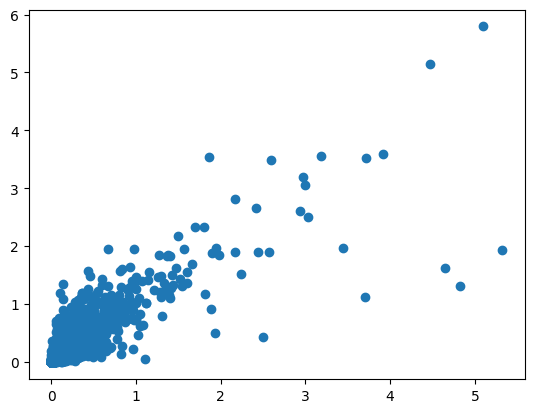

In [112]:
plt.scatter(plot_gt, plot_preds)

In [107]:
from sklearn.metrics import r2_score

In [108]:
def compute_r2_score(preds, ground_truth):
    # Convert to densdataset adata.X is sparse
    ground_truth = ground_truth.X.toarray()
    ground_truth = ground_truth.mean(axis = 0)
    preds = preds.X.mean(axis = 0)
    # Compute R2 score
    r2 = r2_score(ground_truth, preds)
    return r2


In [113]:
compute_r2_score(preds_dbdb_OOD, mSTZ_ground_truth_OOD)

0.6908406335338835

In [136]:
model.save(dir_path="./test_save", save_anndata=True, overwrite=True)

In [120]:
model.adata

AnnData object with n_obs × n_vars = 209722 × 3000
    obs: 'disease', 'dataset', 'organism'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'covariate_orders', 'covariates_dict', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'covariates', 'covariates_embed'

In [134]:
def ndarray_or_dataframe_to_list(data):
    """Converts numpy ndarray or pandas DataFrame to list."""
    if isinstance(data, np.ndarray):
        return data.tolist()
    elif isinstance(data, pd.DataFrame):
        return data.values.tolist()
    else:
        raise ValueError(f"Unsupported data type: {type(data)}")

def save_adata_to_json(adata, filename):
    data = {}

    # Convert .uns to JSON (some nested items might not be directly serializable)
    data['uns'] = {}
    for key, value in adata.uns.items():
        if isinstance(value, (np.ndarray, pd.DataFrame)):
            data['uns'][key] = ndarray_or_dataframe_to_list(value)
        else:
            data['uns'][key] = value

    # Convert .obsm to JSON
    data['obsm'] = {}
    for key, value in adata.obsm.items():
        data['obsm'][key] = ndarray_or_dataframe_to_list(value)

    # Save to JSON file
    with open(filename, 'w') as f:
        json.dump(data, f)




In [128]:
import pandas as pd

In [135]:
save_adata_to_json(model.adata, "./test_save/model_adata_att.json")

### Traying to setup anndata

In [24]:
import torch

In [28]:
torch_test = model_dir + "model.pt"

In [30]:
model_loaded = torch.load(torch_test)

In [32]:
model_loaded.keys()

dict_keys(['model_state_dict', 'var_names', 'attr_dict'])

In [48]:
model_loaded["var_names"]

array(['ENSMUSG00000000049', 'ENSMUSG00000000058', 'ENSMUSG00000000078',
       ..., 'ENSMUSG00000115378', 'ENSMUSG00000117406',
       'ENSMUSG00000117975'], dtype=object)

In [70]:
adata_train.uns["_scvi_uuid"] = model_loaded["attr_dict"]["registry_"]["_scvi_uuid"]

In [73]:
model_loaded["var_names"]

array(['ENSMUSG00000000049', 'ENSMUSG00000000058', 'ENSMUSG00000000078',
       ..., 'ENSMUSG00000115378', 'ENSMUSG00000117406',
       'ENSMUSG00000117975'], dtype=object)

In [65]:
model_loaded["attr_dict"]["registry_"]

{'scvi_version': '1.0.3',
 'model_name': 'transVAE',
 'setup_args': {'categorical_covariate_keys': ['organism'],
  'categorical_covariate_embed_keys': ['dataset'],
  'covariate_orders': {},
  'copy': True,
  'layer': None,
  'covariates':                                       organism_Homo sapiens  \
  TAGACCATCAGAGGTG-1-G1-STZ                                 0   
  GGCCGATTCAAAGTAG-1-mouse4-Fltp_adult                      0   
  TACGGTAGTCCGTGAC-1-G1-STZ                                 0   
  AGATTGCTCTTGTTTG-1-mouse1-Fltp_adult                      0   
  ATTGTTCAGTCTCTGA-1-MUC13634-VSG                           0   
  ...                                                     ...   
  C0027_TTTGTTGGTGCTCCGT-1                                  1   
  C0027_TTTGTTGGTGTGTCCC-1                                  1   
  C0027_TTTGTTGGTTAGTGAT-1                                  1   
  C0027_TTTGTTGGTTTCGCGC-1                                  1   
  C0027_TTTGTTGGTTTGACCT-1                      